In [1]:
import tensorflow as tf ##pip install tensorflow
import numpy as np #pip install numpy
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


In [2]:
IMAGE_SIZE =256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20

In [3]:
plant_images = tf.keras.preprocessing.image_dataset_from_directory(
    "Plant_leaf_diseases_dataset_with_augmentation/Plant_leave_diseases_dataset_with_augmentation",
    shuffle=True,
    # Add other parameters as needed, such as image size, batch size, etc.
    image_size =(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3000 files belonging to 3 classes.


In [4]:
class_names =plant_images.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(plant_images)

94

In [6]:
for image_batch,label_batch in plant_images.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 1 1 1 1 2 2 0 1 0 2 1 0 0 2 1 1 0 0 1 1 0 2 2 0 2 1 1 1 2 2]


 let's analyze what each part signifies:

(32, 256, 256, 3):

This is the shape of your image_batch. It indicates several things about your dataset:
32: There are 32 images in this batch.
256, 256: Each image has a resolution of 256x256 pixels.
3: Each image has 3 color channels, typically representing RGB (Red, Green, Blue).
The array of numbers:

This array represents the labels associated with each of the 32 images in your batch.
The numbers (2, 9, 17, 16, ...) are likely categorical labels assigned to each image. For example, in a plant classification task, each number could correspond to a specific type of plant.
The fact that these labels are numerical (as opposed to textual descriptions) is typical in machine learning, where classes are often encoded as integers for efficiency.
This output is typical in machine learning tasks involving image classification. Each image in your batch has a corresponding label, which is used by the model to learn to associate specific visual patterns in the images with the correct classification labels.

In [7]:
for image_batch,label_batch in plant_images.take(7):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 2 2 0 0 2 1 0 1 2 1 2 1 1 2 1 2 2 0 1 1 2 1 2 0 2 2 1 0 2 0]
(32, 256, 256, 3)
[0 0 1 1 0 1 0 2 2 0 0 0 2 2 1 2 1 1 0 2 0 1 0 0 0 2 0 1 0 1 1 1]
(32, 256, 256, 3)
[2 0 1 2 0 2 1 1 1 2 0 0 0 0 2 2 2 2 2 2 0 2 1 1 1 2 2 1 1 2 1 2]
(32, 256, 256, 3)
[0 0 1 1 2 0 2 0 0 1 0 2 1 0 0 2 2 1 0 1 0 2 1 2 2 1 1 2 2 0 2 2]
(32, 256, 256, 3)
[1 0 2 1 2 0 2 0 1 2 1 1 0 2 0 1 2 1 0 2 0 2 2 0 0 2 1 1 1 1 1 2]
(32, 256, 256, 3)
[0 1 1 1 1 2 1 1 1 1 0 2 0 0 0 0 2 1 2 0 0 1 1 0 1 2 0 1 1 0 1 2]
(32, 256, 256, 3)
[2 0 2 2 1 1 1 2 1 2 2 1 1 1 1 1 1 1 1 1 0 0 2 1 1 1 2 2 1 0 1 2]


In [8]:
for image_batch,label_batch in plant_images.take(1):
    print (image_batch[0])

tf.Tensor(
[[[152.      133.      135.     ]
  [158.95312 139.95312 141.95312]
  [160.52344 141.52344 143.52344]
  ...
  [183.05469 168.05469 173.05469]
  [157.4375  142.4375  147.4375 ]
  [163.      148.      153.     ]]

 [[149.91406 130.91406 132.91406]
  [154.44989 135.44989 137.44989]
  [157.01428 138.01428 140.01428]
  ...
  [181.76184 166.76184 171.76184]
  [165.27063 150.27063 155.27063]
  [177.60156 162.60156 167.60156]]

 [[160.8125  141.8125  143.8125 ]
  [159.84015 140.84015 142.84015]
  [160.16388 141.16388 143.16388]
  ...
  [179.89178 164.89178 169.89178]
  [160.99731 145.99731 150.99731]
  [172.1875  157.1875  162.1875 ]]

 ...

 [[147.44531 132.44531 137.44531]
  [152.3451  137.3451  142.3451 ]
  [159.20258 144.20258 149.20258]
  ...
  [172.28143 159.28143 166.28143]
  [171.74695 158.74695 165.74695]
  [171.0625  158.0625  165.0625 ]]

 [[157.10156 142.10156 147.10156]
  [156.85168 141.85168 146.85168]
  [158.68402 143.68402 148.68402]
  ...
  [171.16577 158.16577 165.

In [9]:
for image_batch,label_batch in plant_images.take(1):
    print (image_batch[0].numpy())

[[[111. 106. 113.]
  [113. 108. 115.]
  [116. 111. 118.]
  ...
  [108. 102. 106.]
  [123. 117. 121.]
  [ 84.  78.  82.]]

 [[115. 110. 117.]
  [116. 111. 118.]
  [118. 113. 120.]
  ...
  [ 88.  82.  86.]
  [105.  99. 103.]
  [109. 103. 107.]]

 [[116. 111. 118.]
  [116. 111. 118.]
  [116. 111. 118.]
  ...
  [ 97.  91.  95.]
  [104.  98. 102.]
  [105.  99. 103.]]

 ...

 [[153. 147. 149.]
  [155. 149. 151.]
  [157. 151. 153.]
  ...
  [132. 124. 121.]
  [132. 124. 121.]
  [134. 126. 123.]]

 [[157. 151. 153.]
  [156. 150. 152.]
  [154. 148. 150.]
  ...
  [129. 121. 118.]
  [124. 116. 113.]
  [122. 114. 111.]]

 [[153. 147. 149.]
  [150. 144. 146.]
  [147. 141. 143.]
  ...
  [141. 133. 130.]
  [131. 123. 120.]
  [123. 115. 112.]]]


In [10]:
for image_batch,label_batch in plant_images.take(1):
    print (image_batch[0].shape)
    

(256, 256, 3)


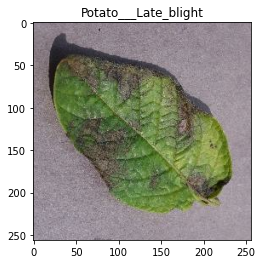

In [11]:

# Looping through the first batch of the dataset
for image_batch, label_batch in plant_images.take(1):
    # Selecting the first image from the batch and converting it to a uint8 type
    first_image = image_batch[0].numpy().astype("uint8")

    # Displaying the image
    plt.imshow(first_image)
    plt.title(class_names[label_batch[0]])
    plt.show()

    

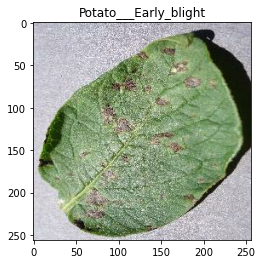

In [12]:
# Skipping the first batch and then taking the next one
for image_batch, label_batch in plant_images.skip(1).take(1):
    # Selecting the first image from this (second) batch
    first_image_batch2 = image_batch[0].numpy().astype("uint8")

    # Displaying the image
    plt.imshow( first_image_batch2)
    plt.title(class_names[label_batch[0]])
    plt.show()

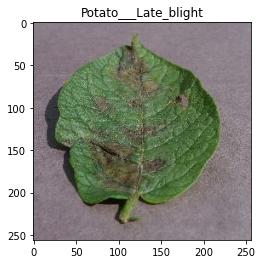

In [13]:

# Skipping the first 3 batches and then taking the next one
for image_batch, label_batch in plant_images.skip(3).take(1):
    # Selecting the sixth image from this fourth batch
    sixth_image = image_batch[5].numpy().astype("uint8")

    # Displaying the image
    plt.imshow(sixth_image)
    # Adding a title to the image using the class name corresponding to the label
    plt.title(class_names[label_batch[5]])
    plt.show()


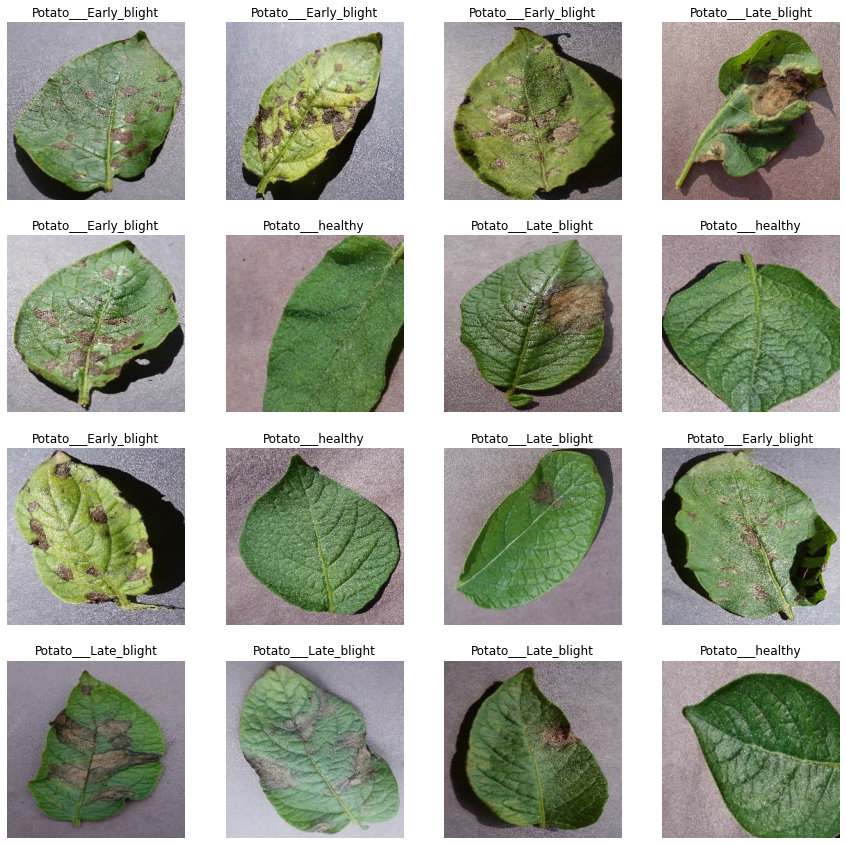

In [14]:
# Setting the figure size
plt.figure(figsize=(15,15))

# Iterating over the first batch
for image_batch, label_batch in plant_images.take(1):
    # Looping through the first 16 images
    for i in range(16):
        # Creating a subplot for each image
        plt.subplot(4, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

# Displaying the plot
plt.show()

        
    

80%==> training
20%==> 10% validation,10% test

In [15]:
train_size = 0.8
len(plant_images)*train_size

75.2

In [16]:
train_ds=plant_images.take(886)
len (train_ds)

94

In [17]:
test_ds= plant_images.skip(886)
len (test_ds)

0

In [18]:
val_size=0.1
len(plant_images)*val_size

9.4

In [19]:
val_ds=test_ds.take(110)
len(val_ds)

0

In [20]:
testing_ds =test_ds.skip(110)
len(testing_ds)

0

In [21]:
import tensorflow as tf

def shuffle_and_split_dataset(dataset, train_split=0.8, val_split=0.1, shuffle_size=1000):
    """
    Shuffle and split a TensorFlow dataset into training, validation, and test sets.

    Parameters:
    - dataset: TensorFlow dataset to be split.
    - train_split: Percentage of the dataset to be used for training (default 80%).
    - val_split: Percentage of the dataset to be used for validation (default 10%).
    - shuffle_size: Number of elements to shuffle.

    Returns:
    - A tuple (train_dataset, val_dataset, test_dataset), each as a TensorFlow dataset.
    """

    # Ensure that the train and validation splits add up to less than 1
    assert train_split + val_split < 1

    # Shuffle the dataset
    dataset = dataset.shuffle(shuffle_size, seed = 12)

    # Calculate split sizes
    dataset_size = len(dataset)
    train_size = int(train_split * dataset_size)
    val_size = int(val_split * dataset_size)
    test_size = dataset_size - train_size - val_size

    # Split the dataset
    train_dataset = dataset.take(train_size)
    val_dataset = dataset.skip(train_size).take(val_size)
    test_dataset = dataset.skip(train_size + val_size)

    return train_dataset, val_dataset, test_dataset


In [22]:
train_data, val_data, test_data = shuffle_and_split_dataset(plant_images)



In [23]:
len(train_data)

75

In [24]:
# Optimizing the train_data pipeline
train_data = train_data.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

# Now, train_data is optimized for training a model
# You can use train_data in your model training loop or with model.fit


In [25]:
# Optimizing the validation data pipeline
val_data = val_data.cache().prefetch(tf.data.AUTOTUNE)

# Optimizing the test data pipeline
test_data = test_data.cache().prefetch(tf.data.AUTOTUNE)

# Now, val_data and test_data are optimized for evaluation and testing


In [26]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])
    

In [27]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [28]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3


In [29]:
plant_model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    # Fewer Conv2D and MaxPooling2D layers
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

plant_model.build(input_shape=input_shape)

In [30]:
plant_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 256, 256, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 128, 128, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 128, 128, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 64, 64, 64)          0         
 g2D)                                                 

In [31]:
plant_model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits =False), metrics=['accuracy'])

In [32]:
history = plant_model.fit(
    train_data,
    epochs=EPOCHS,
    
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data =val_data
)


Epoch 1/20
75/75 [==============================] - 256s 3s/step - loss: 0.9569 - accuracy: 0.6630 - val_loss: 0.3237 - val_accuracy: 0.8785
Epoch 2/20
75/75 [==============================] - 167s 2s/step - loss: 0.2358 - accuracy: 0.8997 - val_loss: 0.2193 - val_accuracy: 0.9028
Epoch 3/20
75/75 [==============================] - 156s 2s/step - loss: 0.1501 - accuracy: 0.9427 - val_loss: 0.2486 - val_accuracy: 0.9062
Epoch 4/20
75/75 [==============================] - 156s 2s/step - loss: 0.1601 - accuracy: 0.9398 - val_loss: 0.2468 - val_accuracy: 0.9062
Epoch 5/20
75/75 [==============================] - 157s 2s/step - loss: 0.1266 - accuracy: 0.9486 - val_loss: 0.1120 - val_accuracy: 0.9653
Epoch 6/20
75/75 [==============================] - 157s 2s/step - loss: 0.1109 - accuracy: 0.9586 - val_loss: 0.1668 - val_accuracy: 0.9410
Epoch 7/20
75/75 [==============================] - 164s 2s/step - loss: 0.0894 - accuracy: 0.9686 - val_loss: 0.0922 - val_accuracy: 0.9688
Epoch 8/20
75

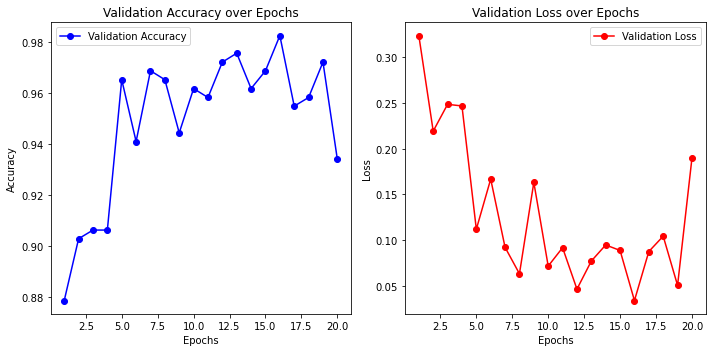

In [33]:

# Data for plotting
epochs = range(1, 21)
validation_accuracy = [0.8785, 0.9028, 0.9062, 0.9062, 0.9653, 0.9410, 0.9688, 0.9653, 0.9444, 0.9618, 
                       0.9583, 0.9722, 0.9757, 0.9618, 0.9688, 0.9826, 0.9549, 0.9583, 0.9722, 0.9340]
validation_loss = [0.3237, 0.2193, 0.2486, 0.2468, 0.1120, 0.1668, 0.0922, 0.0633, 0.1632, 0.0717,
                   0.0918, 0.0465, 0.0772, 0.0948, 0.0888, 0.0340, 0.0876, 0.1044, 0.0506, 0.1896]

# Creating the plot
plt.figure(figsize=(10, 5))

# Plotting validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, validation_accuracy, 'bo-', label='Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, validation_loss, 'ro-', label='Validation Loss')
plt.title('Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
